In [1]:
import os

In [3]:
path_avsd = os.path.join('./avsd')
path_vsd = os.path.join('./vsd')

In [5]:
# menampilkan 10 data pertama dari avsd dan vsd
avsd = os.listdir(path_avsd)
print(avsd[:10])

vsd = os.listdir(path_vsd)
print(vsd[:10])

['Frame00001.jpg', 'Frame00002.jpg', 'Frame00003.jpg', 'Frame00004.jpg', 'Frame00005.jpg', 'Frame00006.jpg', 'Frame00007.jpg', 'Frame00008.jpg', 'Frame00009.jpg', 'Frame00010.jpg']
['Frame00001.jpg', 'Frame00002.jpg', 'Frame00003.jpg', 'Frame00004.jpg', 'Frame00005.jpg', 'Frame00006.jpg', 'Frame00007.jpg', 'Frame00008.jpg', 'Frame00009.jpg', 'Frame00010.jpg']


In [6]:
# menampilan jumlah gambar pada avsd dan vsd
print('total AVSD images:', len(os.listdir(path_avsd)))
print('total VSD images:', len(os.listdir(path_vsd)))

total training horse images: 350
total training human images: 214


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters untuk menampilkan gambar dalam 4x4 grid
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

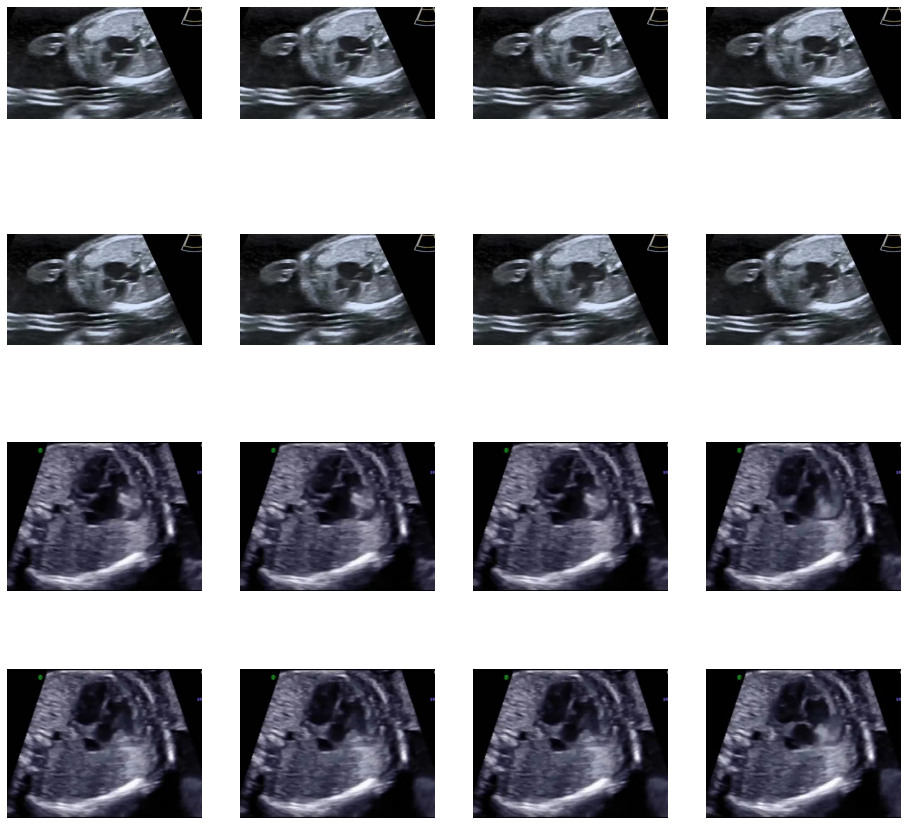

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(path_avsd, fname) 
                for fname in avsd[pic_index-8:pic_index]]
next_human_pix = [os.path.join(path_vsd, fname) 
                for fname in vsd[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

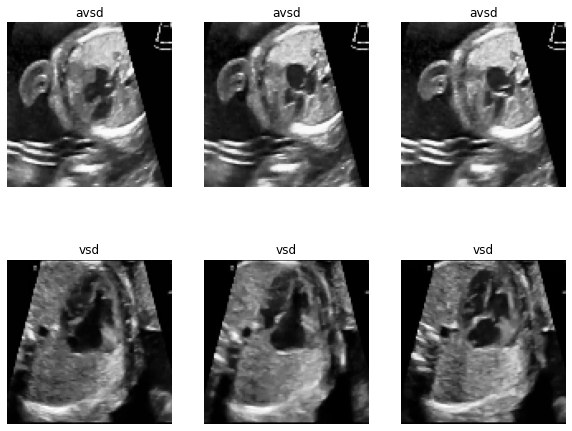

(350, 214)

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np


# get the list of jpegs from sub image class folders
avsd = [fn for fn in os.listdir('./avsd') if fn.endswith('.jpg')]
vsd = [fn for fn in os.listdir('vsd') if fn.endswith('.jpg')]

# randomly select 3 of each
select_norm = np.random.choice(avsd, 3, replace = False)
select_pneu = np.random.choice(vsd, 3, replace = False)

# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (10,8))
for i in range(6):
    if i < 3:
        fp = f'./avsd/{select_norm[i]}'
        label = 'avsd'
    else:
        fp = f'./vsd/{select_pneu[i-3]}'
        label = 'vsd'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here
len(avsd), len(vsd)

In [21]:
def img2np(path, list_of_filename, size = (128, 128)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
avsd_images = img2np(f'./avsd/', avsd)
vsd_images = img2np(f'./vsd/', vsd)

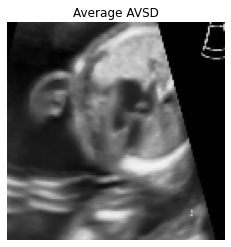

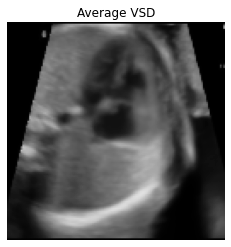

In [23]:

def find_mean_img(full_mat, title, size = (128, 128)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

avsd_mean = find_mean_img(avsd_images, 'AVSD')
vsd_mean = find_mean_img(vsd_images, 'VSD')

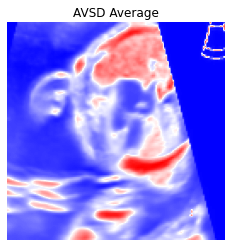

In [24]:
contrast_mean = avsd_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'AVSD Average')
plt.axis('off')
plt.show()

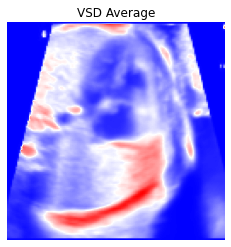

In [25]:
contrast_mean = vsd_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'VSD Average')
plt.axis('off')
plt.show()

Number of PC:  5


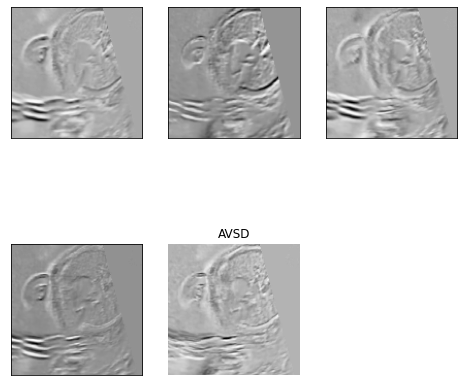

Number of PC:  7


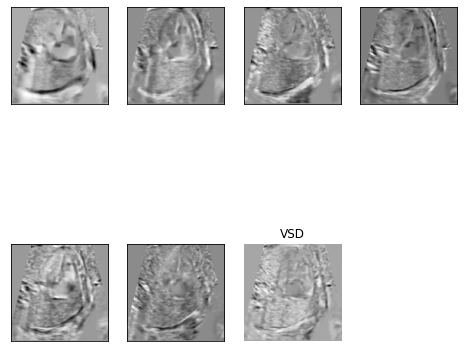

In [31]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, n_comp = 0.7, size = (128, 128)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, title, size = (128, 128)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.title(f'{title}')
    plt.axis('off')
    plt.show()
    
plot_pca(eigenimages(avsd_images), 'AVSD')
plot_pca(eigenimages(vsd_images), 'VSD')